<h1>Financial and Macroeconomic Events and Market Volatility</h1>

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

We consider the following stocks for our project: <br>

\[
\begin{array}{|c|c|c|}
\hline
\textbf{Sector} & \textbf{Ticker} & \textbf{Company Name} \\
\hline
\text{Technology} & \text{AAPL} & \text{Apple Inc.} \\
                  & \text{MSFT} & \text{Microsoft Corporation} \\
                  & \text{NVDA} & \text{NVIDIA Corporation} \\
\hline
\text{Finance} & \text{JPM} & \text{JPMorgan Chase \& Co.} \\
               & \text{BAC} & \text{Bank of America Corporation} \\
               & \text{GS} & \text{The Goldman Sachs Group, Inc.} \\
\hline
\text{Healthcare} & \text{JNJ} & \text{Johnson \& Johnson} \\
                  & \text{PFE} & \text{Pfizer Inc.} \\
                  & \text{UNH} & \text{UnitedHealth Group Incorporated} \\
\hline
\text{Energy} & \text{XOM} & \text{Exxon Mobil Corporation} \\
              & \text{CVX} & \text{Chevron Corporation} \\
              & \text{SLB} & \text{Schlumberger Limited} \\
\hline
\text{Consumer Discretionary} & \text{AMZN} & \text{Amazon.com, Inc.} \\
                              & \text{HD} & \text{The Home Depot, Inc.} \\
                              & \text{TSLA} & \text{Tesla, Inc.} \\
\hline
\text{Benchmark} & \text{SPY} & \text{SPDR S\&P 500 ETF Trust} \\
\hline
\end{array}
\]


We make a list of our stocks:

In [5]:
stocks="SPY AAPL MSFT NVDA JPM BAC GS JNJ PFE UNH XOM CVX SLB AMZN HD TSLA".split()

In [7]:
data={}

We will use the yfinance API to collect stock data from the period of 2019-01-02 to 2024-10-31. (1st January is a Federal holiday and stock market is closed)

In [10]:
for stock in stocks:
    data[stock]=yf.download(stock,start="2019-01-02", end="2024-11-01")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

We can see what data for each stock looks like:

In [13]:
data["NVDA"].head()

Price                     Adj Close    Close     High      Low     Open  \
Ticker                         NVDA     NVDA     NVDA     NVDA     NVDA   
Date                                                                      
2019-01-02 00:00:00+00:00  3.378090  3.40550  3.46200  3.25125  3.26600   
2019-01-03 00:00:00+00:00  3.173996  3.19975  3.37900  3.19225  3.34475   
2019-01-04 00:00:00+00:00  3.377346  3.40475  3.44325  3.24250  3.27350   
2019-01-07 00:00:00+00:00  3.556145  3.58500  3.62225  3.41075  3.46250   
2019-01-08 00:00:00+00:00  3.467613  3.49575  3.66950  3.42250  3.66725   

Price                         Volume  
Ticker                          NVDA  
Date                                  
2019-01-02 00:00:00+00:00  508752000  
2019-01-03 00:00:00+00:00  705552000  
2019-01-04 00:00:00+00:00  585620000  
2019-01-07 00:00:00+00:00  709160000  
2019-01-08 00:00:00+00:00  786016000

We can see the columns:

In [16]:
data["NVDA"].columns

MultiIndex([('Adj Close', 'NVDA'),
            (    'Close', 'NVDA'),
            (     'High', 'NVDA'),
            (      'Low', 'NVDA'),
            (     'Open', 'NVDA'),
            (   'Volume', 'NVDA')],
           names=['Price', 'Ticker'])

The columns are: 
<ul>
<li><b>Adj Close (Adjusted Close Price):</b> The closing price of the stock, adjusted for dividends, stock splits, and other corporate actions. This is usually the most accurate representation of the stock’s value. </li>
<li><b>Close (Close Price):</b> The raw closing price of the stock for the trading day. It does not account for any adjustments like splits or dividends.</li>
<li><b>High:</b> The highest price the stock traded at during the trading day.</li>
<li><b>Low:</b> The lowest price the stock traded at during the trading day.</li>
<li><b>Open:</b> The price at which the stock opened at the start of the trading day.</li>
<li><b>Volume: </b> The total number of shares traded during the day.</li>
</ul>

We can take a look at the distribution adjusted close price for each stock.

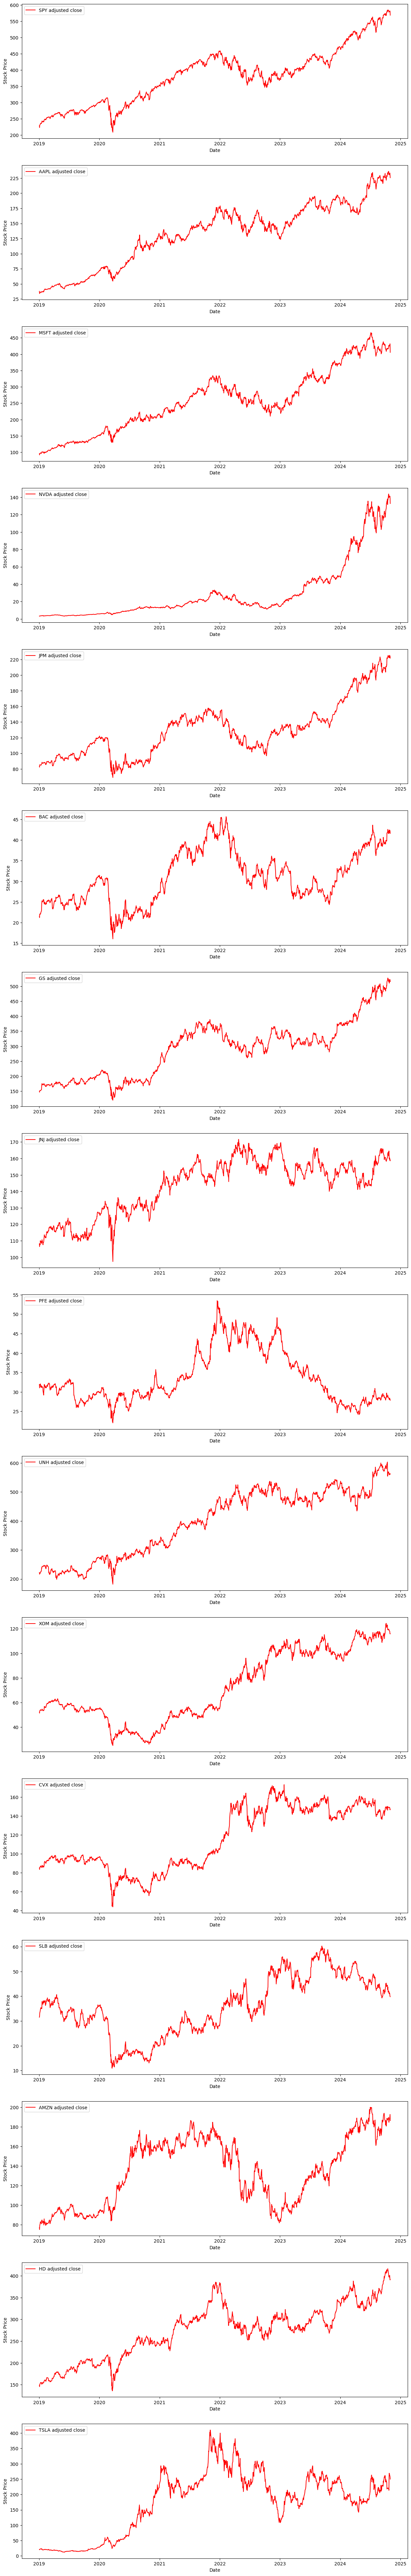

In [23]:
fig,axes=plt.subplots(16,1, figsize=(15,100))
for i in range(len(stocks)):
    adjclose,=axes[i].plot(data[stocks[i]]["Adj Close"][stocks[i]],color="red")
    adjclose.set_label(f"{stocks[i]} adjusted close")
    axes[i].legend(loc="upper left")
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel("Stock Price")

We will now clean up the data a little by removing the multi layered index and combining all stock data into a single data frame.

In [26]:
for stock in data:
    data[stock]["Date"]=data[stock].index
    data[stock].columns = [f"{col[0]}" for col in data[stock].columns]
    data[stock]=data[stock].reset_index(drop=True)
    data[stock]["Stock"]=stock

In [28]:
combined_df=pd.concat([data[stock] for stock in data])
combined_df.reset_index(drop=True,inplace=True)
combined_df

Adj Close       Close        High         Low        Open     Volume  \
0      228.403641  250.179993  251.210007  245.949997  245.979996  126925200   
1      222.953308  244.210007  248.570007  243.669998  248.229996  144140700   
2      230.421234  252.389999  253.110001  247.169998  247.589996  142628800   
3      232.238068  254.380005  255.949997  251.690002  252.690002  103139100   
4      234.420029  256.769989  257.309998  254.000000  256.820007  102512600   
...           ...         ...         ...         ...         ...        ...   
23499  269.190002  269.190002  269.489990  255.320007  256.010010  161611900   
23500  262.510010  262.510010  273.540009  262.239990  270.000000  107653600   
23501  259.519989  259.519989  264.980011  255.509995  264.510010   80521800   
23502  257.549988  257.549988  263.350006  255.820007  258.040009   53993600   
23503  249.850006  249.850006  259.750000  249.250000  257.989990   66575300   

                           Date Stock  
0     2019-01-02 00:00:00+00:00   SPY  
1     2019-01-03 00:00:00+00:00   SPY  
2     2019-01-04 00:00:00+00:00   SPY  
3     2019-01-07 00:00:00+00:00   SPY  
4     2019-01-08 00:00:00+00:00   SPY  
...                         ...   ...  
23499 2024-10-25 00:00:00+00:00  TSLA  
23500 2024-10-28 00:00:00+00:00  TSLA  
23501 2024-10-29 00:00:00+00:00  TSLA  
23502 2024-10-30 00:00:00+00:00  TSLA  
23503 2024-10-31 00:00:00+00:00  TSLA  

[23504 rows x 8 columns]

We will save this stock dataset into a csv file.

In [32]:
combined_df.to_csv("stocks.csv",index_label=False)

In [34]:
combined_df.dtypes

Adj Close                float64
Close                    float64
High                     float64
Low                      float64
Open                     float64
Volume                     int64
Date         datetime64[ns, UTC]
Stock                     object
dtype: object

We read this csv back but we have to specify our datatypes this time

In [86]:
df = pd.read_csv("stocks.csv",
    dtype={
        "Adj Close": "float64",
        "Close": "float64",
        "High": "float64",
        "Low": "float64",
        "Open": "float64",
        "Volume": "int64",
        "Stock": "object"
    },
    parse_dates=["Date"]
)

We do some basic data checks like checking duplicates or missing data

In [89]:
df.isnull().sum()

Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
Date         0
Stock        0
dtype: int64

In [91]:
df.duplicated().sum()

0

There aren't any missing or duplicate records.

In [94]:
df.describe()

Adj Close         Close          High           Low          Open  \
count  23504.000000  23504.000000  23504.000000  23504.000000  23504.000000   
mean     164.576592    172.890983    174.668098    171.003901    172.849946   
std      132.892044    136.270261    137.401541    135.067730    136.248531   
min        3.173996      3.199750      3.379000      3.192250      3.266000   
25%       46.924065     49.805624     50.432249     49.084999     49.747500   
50%      138.512726    145.779999    147.245003    144.229996    145.720001   
75%      243.314781    253.025005    256.864990    249.215004    252.847496   
max      603.086914    605.400024    608.630005    597.880005    604.260010   

             Volume  
count  2.350400e+04  
mean   6.331272e+07  
std    1.215815e+08  
min    4.601000e+05  
25%    7.072250e+06  
50%    2.101295e+07  
75%    6.341745e+07  
max    2.511528e+09

We will do some feature engineering now. 

We create a new feature "Daily Return". Daily returns are the percentage change in the adjusted close price from one day to the next.

In [97]:
df["Daily Return"]=df.groupby('Stock')["Adj Close"].pct_change()
df.head()

Adj Close       Close        High         Low        Open     Volume  \
0  228.403641  250.179993  251.210007  245.949997  245.979996  126925200   
1  222.953308  244.210007  248.570007  243.669998  248.229996  144140700   
2  230.421234  252.389999  253.110001  247.169998  247.589996  142628800   
3  232.238068  254.380005  255.949997  251.690002  252.690002  103139100   
4  234.420029  256.769989  257.309998  254.000000  256.820007  102512600   

                       Date Stock  Daily Return  
0 2019-01-02 00:00:00+00:00   SPY           NaN  
1 2019-01-03 00:00:00+00:00   SPY     -0.023863  
2 2019-01-04 00:00:00+00:00   SPY      0.033495  
3 2019-01-07 00:00:00+00:00   SPY      0.007885  
4 2019-01-08 00:00:00+00:00   SPY      0.009395

The first row for every stock would have an NaN value. This is expected because there is no previous day to calculate percentage change from. So we leave these rows unchanged for now.

Next we derive another feature called "Rolling Volatility". Rolling volatility helps us see the trend of volatility over time. This measures how much the stock’s daily returns fluctuate over a specific period, typically calculated as the standard deviation of the daily returns in a rolling window. To explore immediate impacts, medium term changes, and long term stability, we will create 3 rolling windows of 7 days, 30 days and 90 days respectively.

In [101]:
for window in [7,30,90]:
    df[f"Rolling Volatility {window}D"]=df.groupby("Stock")["Daily Return"].rolling(window=window).std().reset_index(level=0,drop=True)

In [103]:
df.head()

Adj Close       Close        High         Low        Open     Volume  \
0  228.403641  250.179993  251.210007  245.949997  245.979996  126925200   
1  222.953308  244.210007  248.570007  243.669998  248.229996  144140700   
2  230.421234  252.389999  253.110001  247.169998  247.589996  142628800   
3  232.238068  254.380005  255.949997  251.690002  252.690002  103139100   
4  234.420029  256.769989  257.309998  254.000000  256.820007  102512600   

                       Date Stock  Daily Return  Rolling Volatility 7D  \
0 2019-01-02 00:00:00+00:00   SPY           NaN                    NaN   
1 2019-01-03 00:00:00+00:00   SPY     -0.023863                    NaN   
2 2019-01-04 00:00:00+00:00   SPY      0.033495                    NaN   
3 2019-01-07 00:00:00+00:00   SPY      0.007885                    NaN   
4 2019-01-08 00:00:00+00:00   SPY      0.009395                    NaN   

   Rolling Volatility 30D  Rolling Volatility 90D  
0                     NaN                     NaN  
1                     NaN                     NaN  
2                     NaN                     NaN  
3                     NaN                     NaN  
4                     NaN                     NaN

The rolling volatility for the first few rows of each stock is NaN. This is expected as there aren't enough data points available before it to calculate the volatility over a period of window days. We will leave these rows unchanged for now.

We can take a look at the rolling volatility for each stock over our time period.

In [118]:
fig, axes = plt.subplots(16, 1, figsize=(15, 100), dpi=200)

for i, stock in enumerate(stocks):
    data = df[df['Stock'] == stock]

    vol7day,=axes[i].plot(data['Date'], data["Rolling Volatility 7D"], label="7-Day Volatility")
    vol30day,=axes[i].plot(data['Date'], data["Rolling Volatility 30D"], label="30-Day Volatility")
    vol90day,=axes[i].plot(data['Date'], data["Rolling Volatility 90D"], label="90-Day Volatility")

    axes[i].set_title(f"Rolling Volatility for {stock}")
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel("Volatility")
    axes[i].legend(loc="upper right")

plt.tight_layout()

We can also take a look at the summary statistics for our newly added columns.

In [110]:
print("Summary Statistics for Daily Returns:")
print(df["Daily Return"].describe())

for window in [7, 30, 90]:
    print(f"Summary Statistics for Rolling Volatility ({window}D):")
    print(df[f"Rolling Volatility {window}D"].describe())

Summary Statistics for Daily Returns:
count    23488.000000
mean         0.001011
std          0.022499
min         -0.274214
25%         -0.008797
50%          0.000827
75%          0.010615
max          0.243696
Name: Daily Return, dtype: float64
Summary Statistics for Rolling Volatility (7D):
count    23392.000000
mean         0.018213
std          0.013410
min          0.001243
25%          0.009956
50%          0.014558
75%          0.021995
max          0.150076
Name: Rolling Volatility 7D, dtype: float64
Summary Statistics for Rolling Volatility (30D):
count    23024.000000
mean         0.019263
std          0.011691
min          0.003464
25%          0.011984
50%          0.016022
75%          0.022184
max          0.097454
Name: Rolling Volatility 30D, dtype: float64
Summary Statistics for Rolling Volatility (90D):
count    22064.000000
mean         0.020085
std          0.010635
min          0.005498
25%          0.012891
50%          0.016557
75%          0.024126
max       

In [112]:
df.dtypes

Adj Close                             float64
Close                                 float64
High                                  float64
Low                                   float64
Open                                  float64
Volume                                  int64
Date                      datetime64[ns, UTC]
Stock                                  object
Daily Return                          float64
Rolling Volatility 7D                 float64
Rolling Volatility 30D                float64
Rolling Volatility 90D                float64
dtype: object

We will save this featured dataset to csv.

In [115]:
df.to_csv("featured_stocks.csv", index_label=False)